## Análisis de componentes principales en Python

#### 1. Carga de librerias y datos

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
estudiantes=pd.read_csv('C:/Users/pc/Desktop/rociochavez/Rocio-Chavez-youtube-Files-master/Ejemplo Estudiantes.csv', index_col=0)

In [3]:
estudiantes

,Matematicas,Ciencias,Espanol,Historia,Deportes
Estudiante,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7


#### 2. Estandarizamos los datos

In [6]:
#Crear un objeto StandardScaler
scaler =StandardScaler(with_mean=True, with_std=True)

#Ajustar el scaler a los datos y transformar los datos estandarizados
estudiantes_std=scaler.fit_transform(estudiantes)

#Imprimir los datos estandarizados
estudiantes_std

array([[ 0.23263076, -0.7529862 ,  1.78848525,  0.65792263,  0.65858084],
       [ 0.78651352,  1.14584856, -0.53899555, -0.84590053, -0.47690337],
       [ 0.89729007,  1.01489444,  0.31849737,  0.09398895,  0.09083874],
       [-1.98290027, -0.7529862 , -1.51898747, -0.84590053,  1.79406505],
       [-0.87513476, -1.0803715 ,  0.07349939,  0.93988948, -0.13625811],
       [ 1.11884317,  1.27680268, -0.0489996 ,  0.09398895, -1.04464547],
       [-0.5428051 , -0.81846326,  0.56349535,  1.03387842, -0.24980653],
       [ 1.22961972,  1.34227974, -0.29399757,  0.09398895, -1.61238758],
       [-0.87513476, -1.0803715 , -1.51898747, -2.25573474,  1.45341979],
       [ 0.01107766, -0.29464677,  1.1759903 ,  1.03387842, -0.47690337]])

##### 2.1 Pedimos que muestre la media y la desviación estandar de datos

In [8]:
np.mean([estudiantes_std[:,0]])

np.std(estudiantes_std[:,0])

1.0

#### 3. Llevamos a cabo el análisis de los componenetes principales

In [10]:
#Creamos el modelo PCA indicandole que queremos solamente 2 componentes principales
pca=PCA(n_components=2)

#Obtendremos las componentes principales
estudiantes_pca=pca.fit_transform(estudiantes_std)

#Imprimir los datos transformados
print(estudiantes_pca)

[[-0.32306263  1.7725245 ]
 [-0.66544057 -1.63870215]
 [-1.00254705 -0.51569247]
 [ 3.17209481 -0.26278201]
 [ 0.48886797  1.3654021 ]
 [-1.70863322 -1.02170044]
 [-0.06758577  1.46233642]
 [-2.01185516 -1.27586457]
 [ 3.04203029 -1.25488069]
 [-0.92386867  1.3693593 ]]


##### 3.1. Varianza explicada por cada componente

In [12]:
pca.explained_variance_ratio_

array([0.57864993, 0.32573008])

In [13]:
np.sum(pca.explained_variance_ratio_)

0.9043800196790526

#### 4. Ubicamos los estudiantes en el plano bidimencional

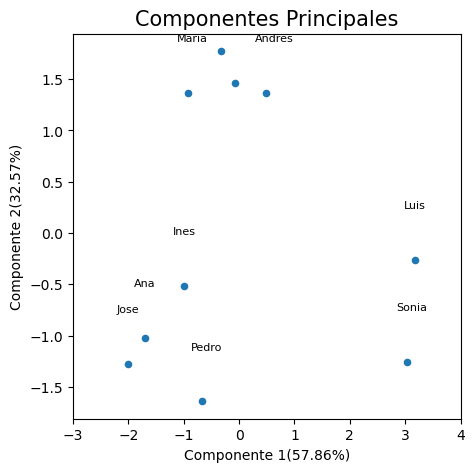

In [26]:
fig =plt.figure(figsize=(5,5))
plt.rcParams['font.family']='sans-serif'

x_label='Componente 1(' + str(round(pca.explained_variance_ratio_[0]*100,2))+'%)'
y_label='Componente 2(' + str(round(pca.explained_variance_ratio_[1]*100,2))+'%)'

nombres=estudiantes.index

ax=fig.add_subplot(1,1,1)
ax.set_xlabel(x_label, fontsize=10)
ax.set_ylabel(y_label, fontsize=10)
ax.set_title('Componentes Principales', fontsize=15)
ax.set_xlim(-3,4)

ax.scatter(x = estudiantes_pca[:,0], y = estudiantes_pca[:,1], s=20)

for i, nombre in enumerate(nombres):
    ax.annotate(nombre, (estudiantes_pca[i,0]-0.2, estudiantes_pca[i,1]+0.5), fontsize=8)

plt.show()